# The Project
The objective of this project is to predict employee attrition using historical HR data. By analyzing various personal and job-related features, the goal is to build a machine learning model capable of identifying patterns associated with employee turnover.


# Imports

In [104]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Evaluation
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc, make_scorer
)

# Pipeline and model saving
from sklearn.pipeline import Pipeline
import joblib


In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df = pd.read_pickle('/content/drive/MyDrive/Desafío Data Science - F1rst Santander/attrition_dataset.pkl')


# Exploratory Data Analysis (EDA) and Preprocessing

This section explores the dataset to understand its structure, feature types, distributions, and potential issues such as missing values or outliers. These insights will guide the preprocessing and modeling steps.


## Dataset Overview and Missing Values

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 1 to 3786
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      1426 non-null   float64
 1   absences                 1426 non-null   int64  
 2   JobInvolvement           1279 non-null   float64
 3   PerformanceRating        1426 non-null   int64  
 4   EnvironmentSatisfaction  1418 non-null   float64
 5   JobSatisfaction          1267 non-null   float64
 6   WorkLifeBalance          1419 non-null   float64
 7   Age                      1292 non-null   float64
 8   Attrition                1426 non-null   object 
 9   BusinessTravel           1426 non-null   object 
 10  Department               1426 non-null   object 
 11  DistanceFromHome         1426 non-null   int64  
 12  Education                1426 non-null   int64  
 13  EducationField           1426 non-null   object 
 14  EmployeeCount            1426

In [108]:
df.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1426.000000,1426.000000,1279.000000,1426.000000,1418.000000,1267.000000,1419.000000,1292.000000,1426.000000,1426.000000,...,1293.000000,1420.000000,1426.000000,1426.0,1426.000000,1424.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,7.622009,12.596774,2.722439,3.156381,2.672073,2.658248,2.711769,35.427245,9.367461,2.908135,...,63568.437742,2.805634,15.256662,8.0,0.767882,10.048455,2.742637,6.284011,2.013324,3.615708
std,1.439585,5.506943,0.756022,0.363344,1.131606,1.092492,0.758178,9.330001,8.016363,1.009070,...,46313.904737,2.557631,3.701689,0.0,0.832738,7.623228,1.266726,6.149938,3.125307,3.507326
min,5.465741,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.438629,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,29.000000,2.000000,2.000000,...,28530.000000,1.000000,12.000000,8.0,0.000000,5.000000,2.000000,2.000000,0.000000,0.000000
50%,7.322339,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,34.000000,7.000000,3.000000,...,48210.000000,2.000000,14.000000,8.0,1.000000,9.000000,3.000000,5.000000,1.000000,2.000000
75%,8.660602,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,41.000000,15.000000,4.000000,...,76440.000000,4.000000,18.000000,8.0,1.000000,13.000000,3.000000,9.000000,2.000000,7.000000
max,10.937261,23.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,198590.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


The following heatmap provides a visual overview of missing values in the dataset. Yellow areas indicate null values.

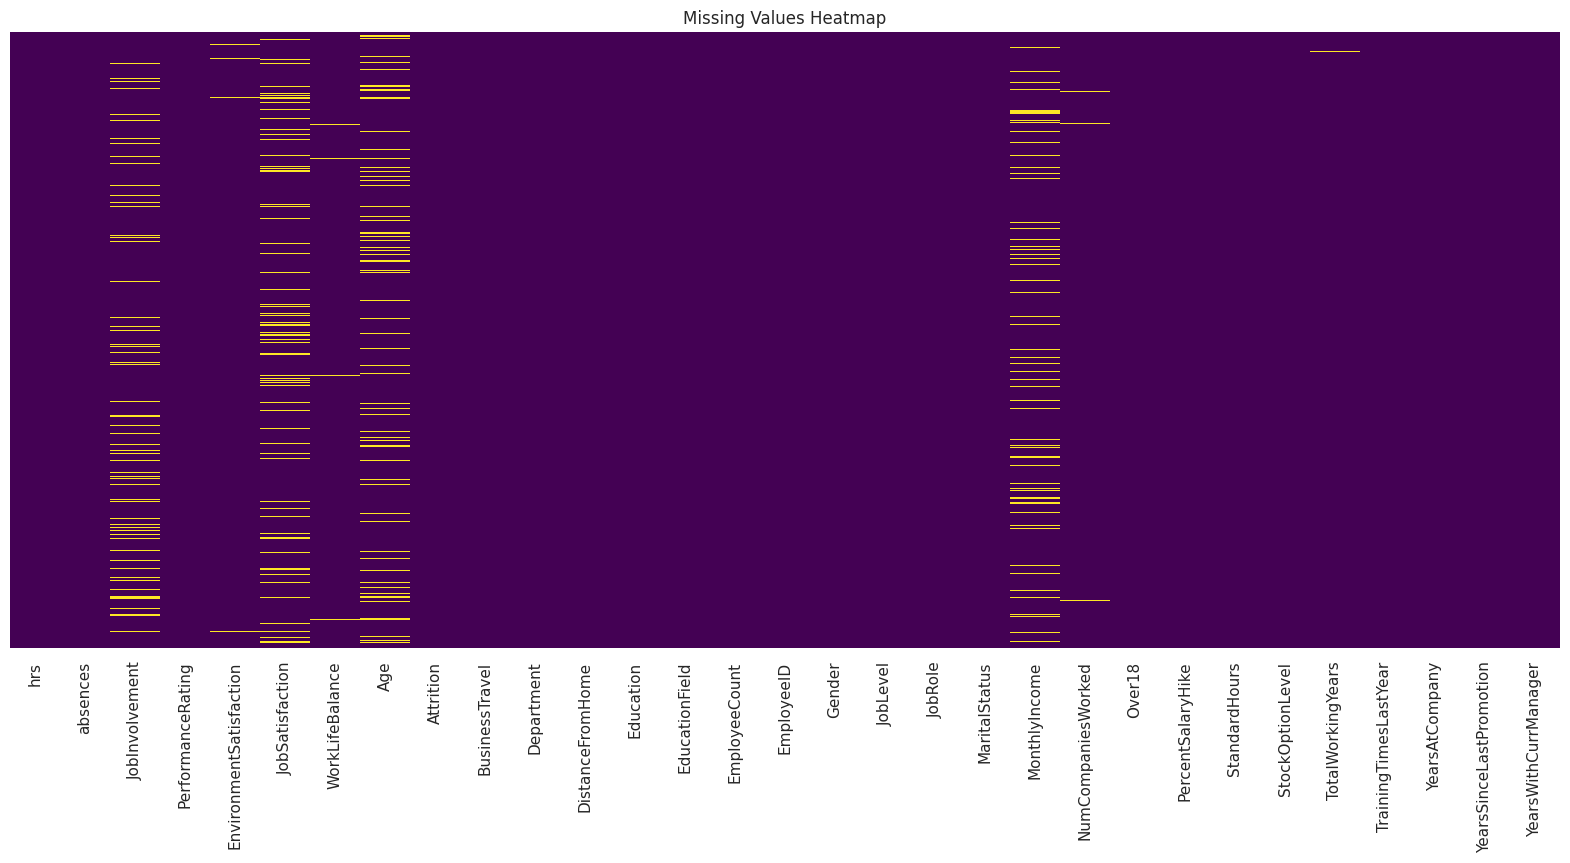

In [109]:
sns.set(style="white")

plt.figure(figsize=(20, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [110]:
df.isnull().sum()

,0
hrs,0
absences,0
JobInvolvement,147
PerformanceRating,0
EnvironmentSatisfaction,8
JobSatisfaction,159
WorkLifeBalance,7
Age,134
Attrition,0
BusinessTravel,0


In [111]:
missing_values_percentage = df.isnull().mean() * 100

# Filter columns with missing values and sort them in descending order
columns_with_missing = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)

# Display results
if columns_with_missing.empty:
    print("No missing values found in the dataset.")
else:
    print("Columns with missing values:")
    for column, pct in columns_with_missing.items():
        print(f"{column}: {pct:.2f}% missing values")

Columns with missing values:
JobSatisfaction: 11.15% missing values
JobInvolvement: 10.31% missing values
Age: 9.40% missing values
MonthlyIncome: 9.33% missing values
EnvironmentSatisfaction: 0.56% missing values
WorkLifeBalance: 0.49% missing values
NumCompaniesWorked: 0.42% missing values
TotalWorkingYears: 0.14% missing values


To enable clean visualizations during the exploratory phase, missing values were imputed before generating distribution plots.

- *'JobSatisfaction', 'JobInvolvement', and 'WorkLifeBalance'* were imputed using the **mode**, assuming that the most frequent category best represents the central tendency.

- *'EnvironmentSatisfaction'* was also imputed with the **mode (4)**, anticipating a right-skewed distribution—later confirmed during histogram analysis.

- *'Age', 'MonthlyIncome', 'NumCompaniesWorked', and 'TotalWorkingYears'* were imputed using the **median**, as these variables were expected to contain outliers—validated through boxplots.

This approach ensured robustness while allowing the dataset to be fully visualized and analyzed in the following steps.


In [112]:
# Impute ordinal variables with mode
ordinal_cols = ['JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction', 'WorkLifeBalance']
for col in ordinal_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute numerical variables with median
median_cols = ['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears']
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())

## Categorical Distributions, Target Balance, and Numeric Histograms


The target variable in this project is *'Attrition'*, which indicates whether an employee has left the company or not. Understanding the distribution of this variable is crucial to identify potential class imbalance and inform the choice of evaluation metrics during modeling.

In [113]:
df['Attrition'].value_counts()

,count
Attrition,
No,715
Yes,711


<ipython-input-114-0caef609d73d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


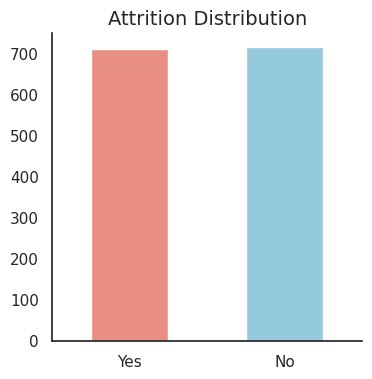

In [114]:
sns.set(style="white")

plt.figure(figsize=(4, 4))
sns.countplot(
    x='Attrition',
    data=df,
    palette={'Yes': 'salmon', 'No': 'skyblue'},
    width=0.5
)

plt.title('Attrition Distribution', fontsize=14)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

I now explore the distribution of numerical features using histograms with KDE. This helps detect skewness and potential outliers in the data.

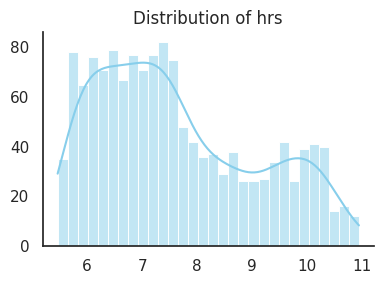

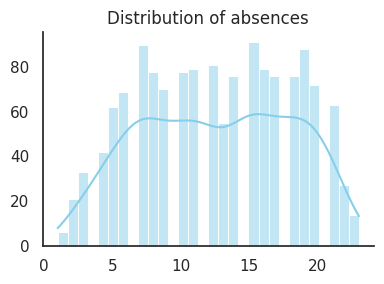

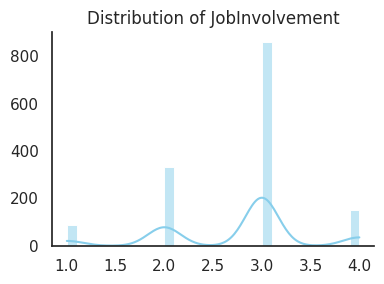

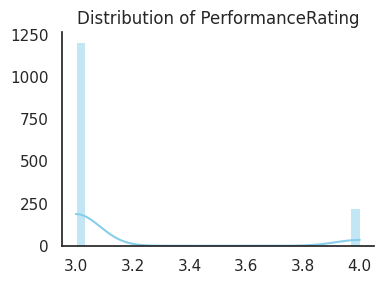

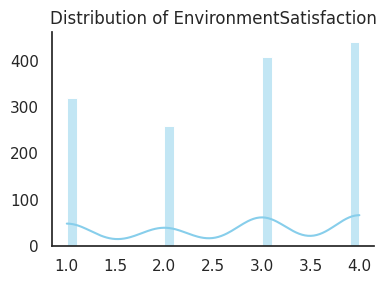

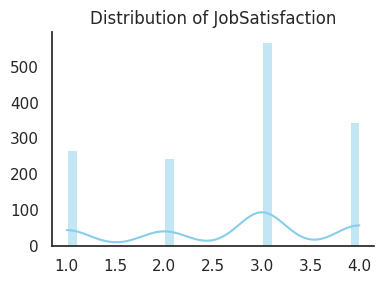

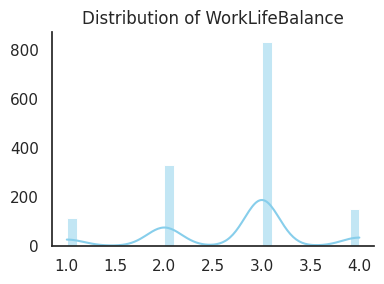

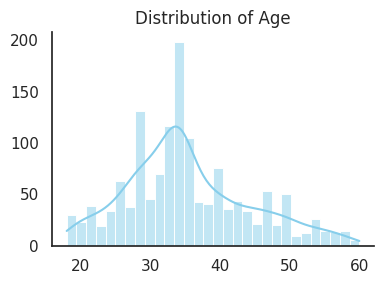

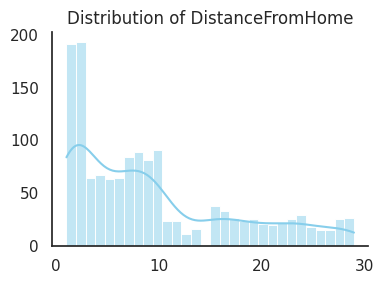

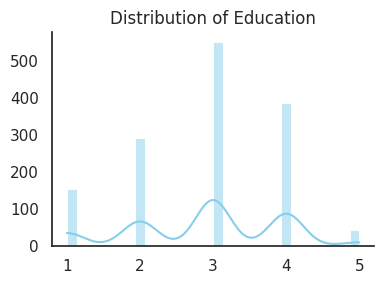

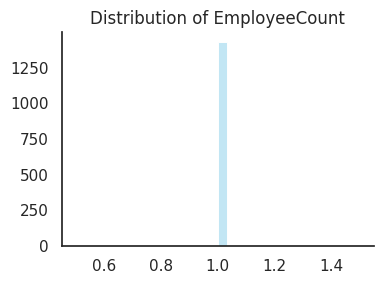

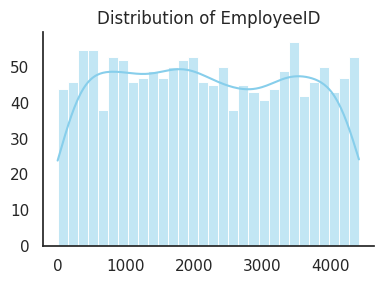

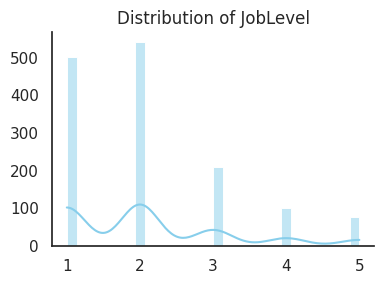

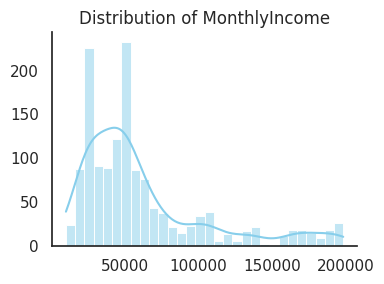

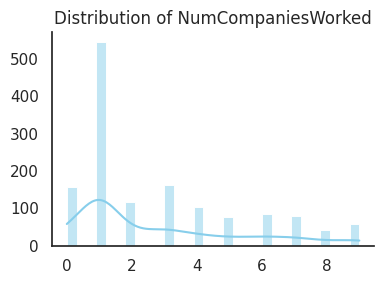

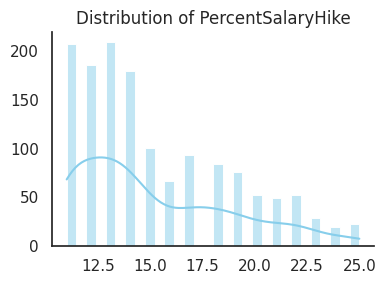

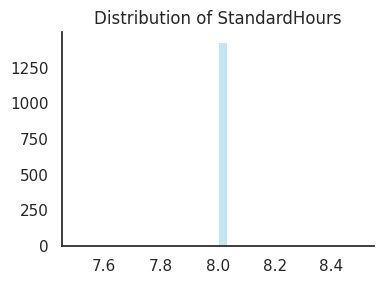

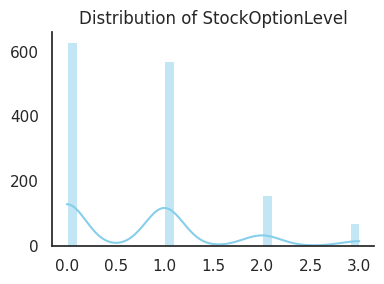

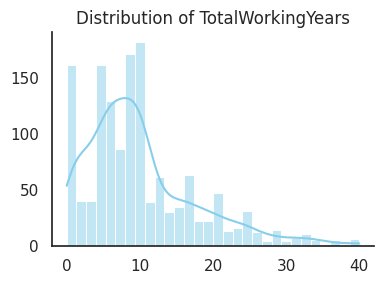

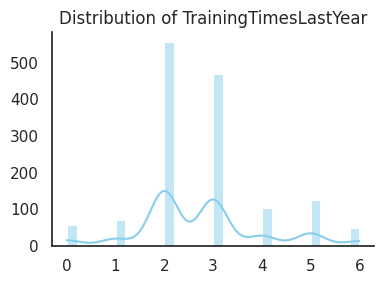

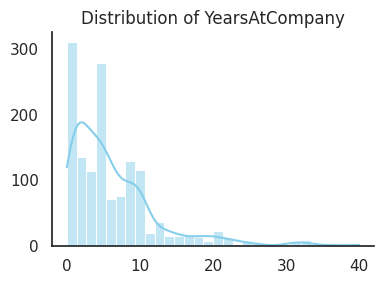

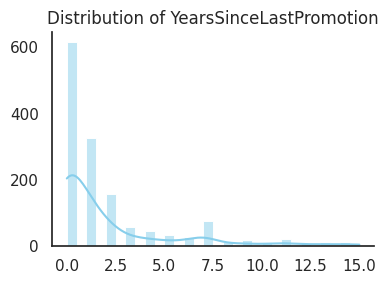

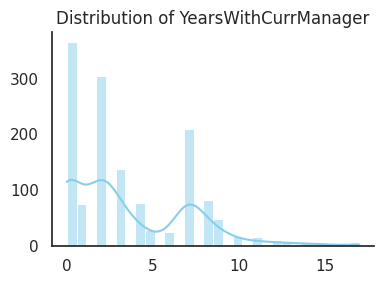

In [115]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')
    sns.despine()
    plt.tight_layout()
    plt.show()

This section displays the frequency distribution of all categorical features in the dataset (excluding the target variable).


<ipython-input-116-b9cf2515ff24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


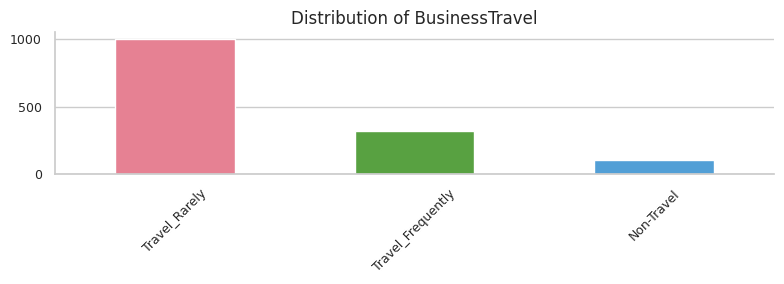

<ipython-input-116-b9cf2515ff24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


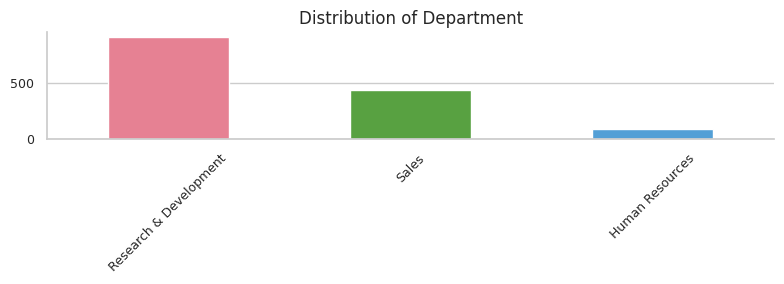

<ipython-input-116-b9cf2515ff24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


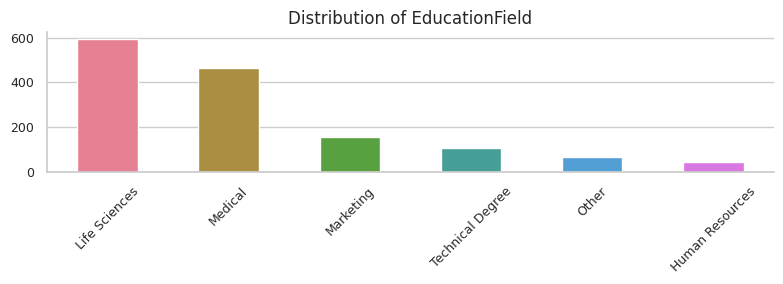

<ipython-input-116-b9cf2515ff24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


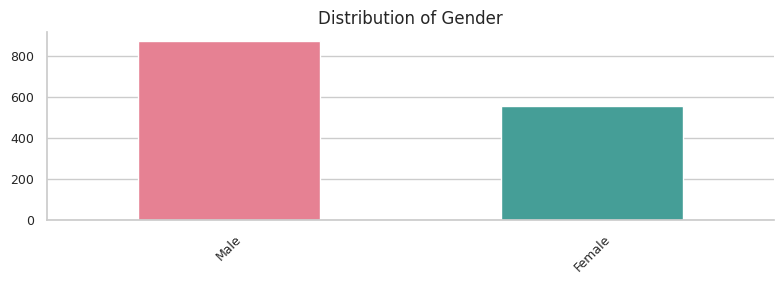

<ipython-input-116-b9cf2515ff24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


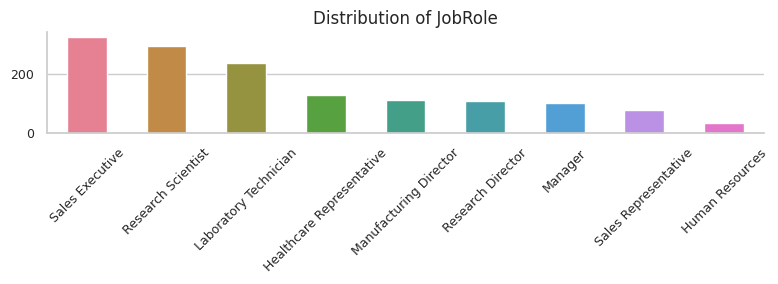

<ipython-input-116-b9cf2515ff24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


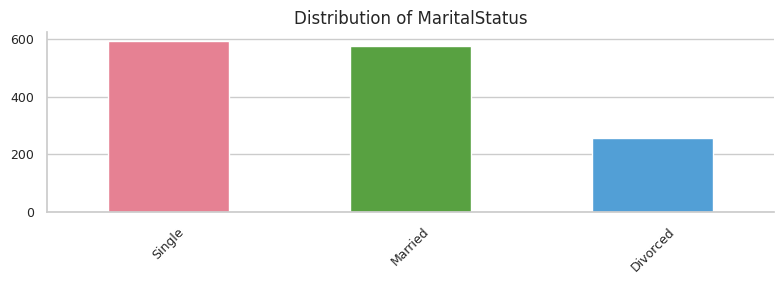

<ipython-input-116-b9cf2515ff24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


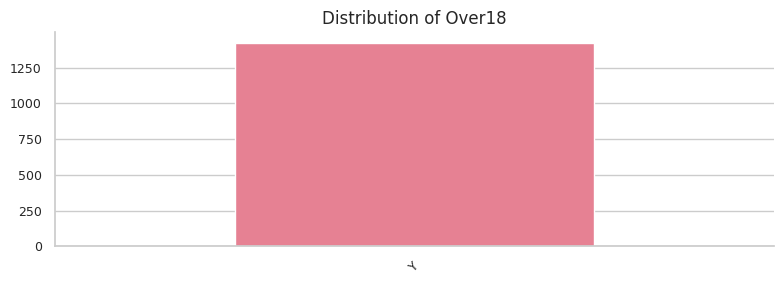

In [116]:
# Plot frequency distribution of all categorical features (excluding target)
sns.set(style="whitegrid")
categorical_attributes = df.select_dtypes(include='object').columns.drop('Attrition')

for col in categorical_attributes:
    counts = df[col].value_counts()

    plt.figure(figsize=(8, 3))
    sns.barplot(
        x=counts.index,
        y=counts.values,
        palette=sns.color_palette("husl", n_colors=len(counts)),
        width=0.5
    )
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45, fontsize=9)
    plt.yticks(fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine()
    plt.tight_layout()
    plt.show()

## Categorical Features vs. Attrition

This section explores how categorical variables relate to *'Attrition'.*
By visualizing the proportion of employees who left within each category, we can identify potential drivers of attrition.


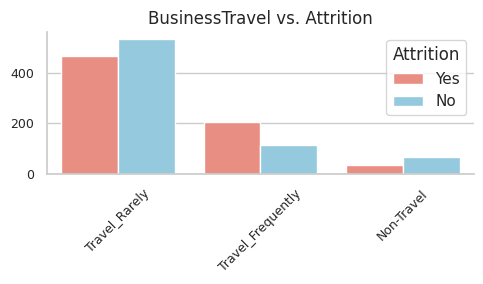

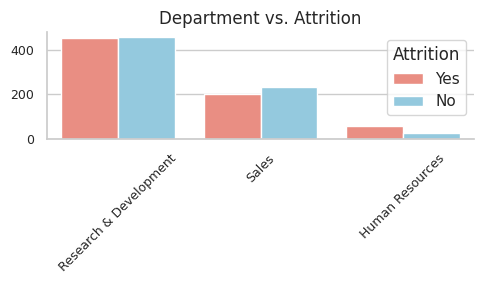

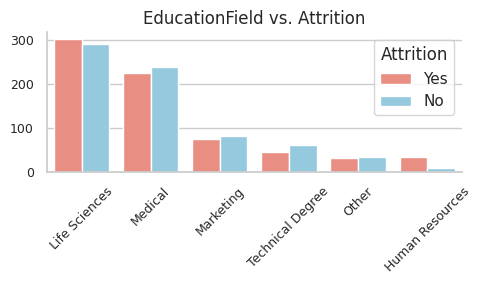

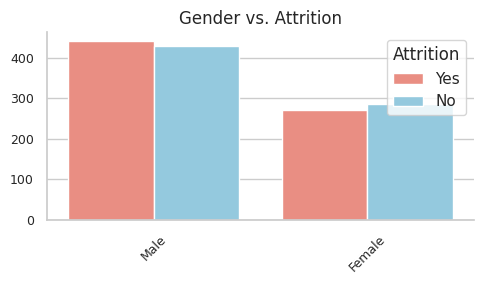

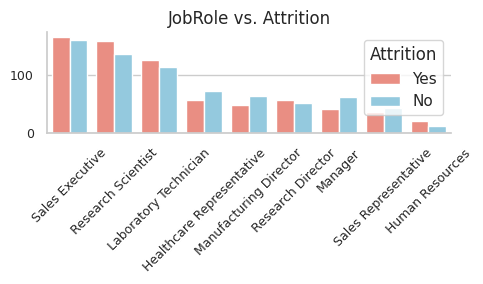

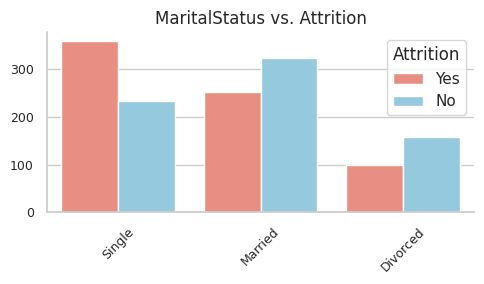

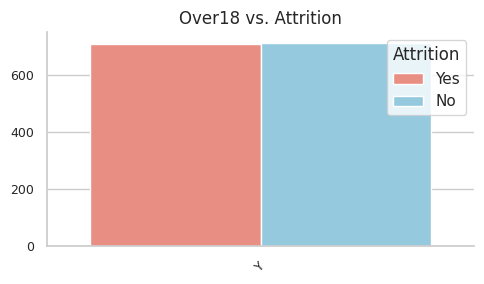

In [117]:
# Plot categorical features against Attrition
categorical_cols = df.select_dtypes(include='object').drop(columns='Attrition').columns

for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(
        data=df,
        x=col,
        hue='Attrition',
        order=df[col].value_counts().index,
        palette={'Yes': 'salmon', 'No': 'skyblue'}
    )
    plt.title(f'{col} vs. Attrition', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45, fontsize=9)
    plt.yticks(fontsize=9)
    sns.despine()
    plt.tight_layout()
    plt.show()

## Numercal Distributions and Outliers

Boxplots are used to compare the distribution of numerical features between employees who stayed and those who left the company. This helps identify potential differences that may be associated with attrition.


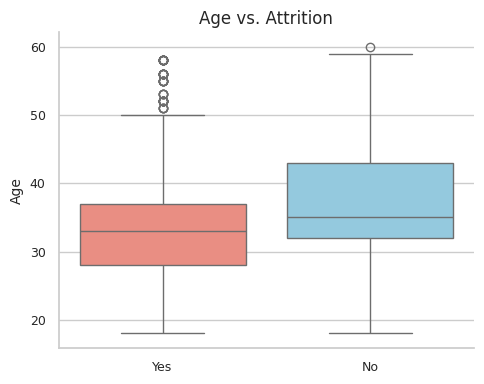

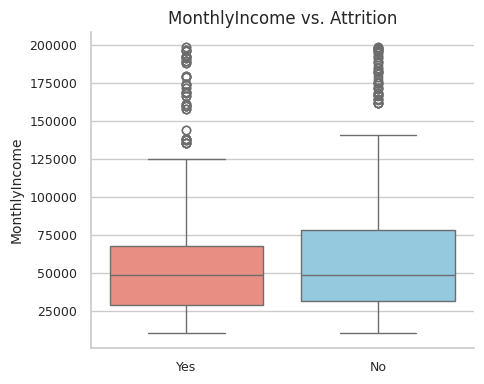

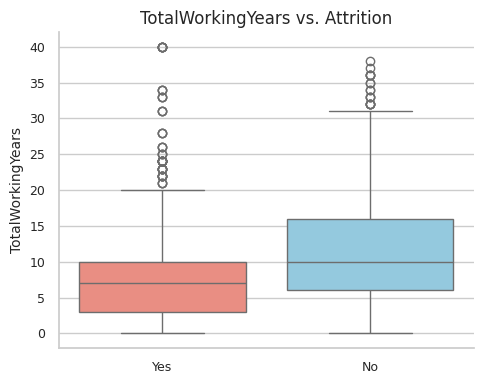

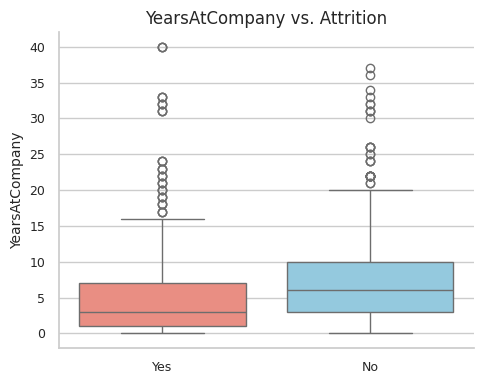

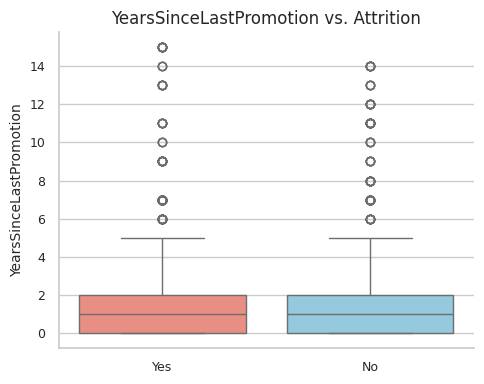

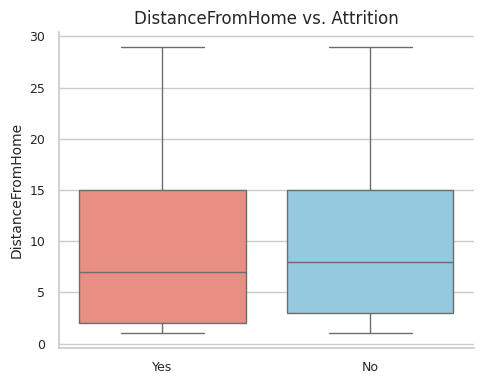

In [118]:
# Boxplots for numerical features vs Attrition
num_vars = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'DistanceFromHome']

for col in num_vars:
    plt.figure(figsize=(5, 4))
    sns.boxplot(
        data=df,
        x='Attrition',
        y=col,
        hue='Attrition',
        palette={'Yes': 'salmon', 'No': 'skyblue'},
        dodge=False,
        legend=False
    )
    plt.title(f'{col} vs. Attrition', fontsize=12)
    plt.xlabel('')
    plt.ylabel(col, fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    sns.despine()
    plt.tight_layout()
    plt.show()



## Variable Cleaning and Reduction

In [119]:
# Drop constant or non-informative features
cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']
df.drop(columns=cols_to_drop, inplace=True)


The following columns were removed from the dataset:

- 'EmployeeCount', 'Over18', and 'StandardHours' are constant across all records and provide no predictive value.
- 'EmployeeID' is a unique identifier and does not contribute to the prediction task.


### Categorical Encoding

Categorical variables were encoded to ensure compatibility with machine learning algorithms:

- Binary variables were label encoded.
- Variables with more than two categories were one-hot encoded with 'drop_first = True' to avoid multicollinearity.
- The target variable 'Attrition' was encoded as 1 for 'Yes' and 0 for 'No'.


In [120]:
# Remove previous encoding if it exists
if 'Attrition_num' in df.columns:
    df.drop(columns='Attrition_num', inplace=True)

In [121]:
# Create a copy of the dataset (excluding any prior encodings)
df_encoded = df.copy()

# Identify categorical columns (excluding the target)
categorical_cols = df_encoded.select_dtypes(include='object').drop(columns='Attrition').columns

# Label encode binary categorical features
le = LabelEncoder()
for col in categorical_cols:
    if df_encoded[col].nunique() == 2:
        df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode multi-category features
multi_cat_cols = [col for col in categorical_cols if df_encoded[col].nunique() > 2]
df_encoded = pd.get_dummies(df_encoded, columns=multi_cat_cols, drop_first=True)

# Encode the target variable
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})



## Correlation Analysis

To assess potential multicollinearity among numerical features, I calculated the Pearson correlation matrix and visualized it using a heatmap. Identifying strongly correlated variables can help reduce redundancy and improve model interpretability.


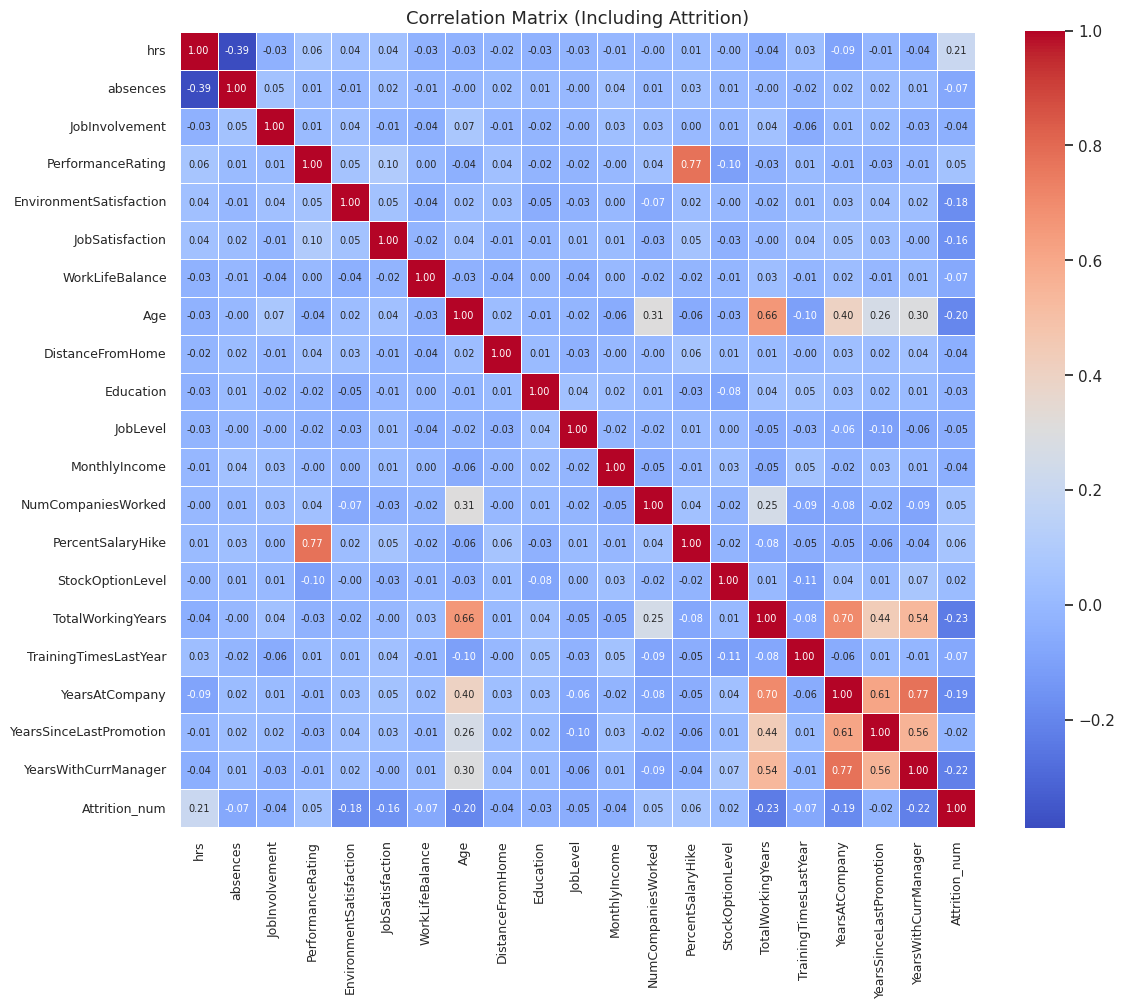

In [122]:
# Create numeric version of the target variable
df['Attrition_num'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Compute correlation matrix (including Attrition)
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    annot_kws={"size": 7}
)
plt.title("Correlation Matrix (Including Attrition)", fontsize=13)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

From the correlation matrix, the following observations can be made:

- *'TotalWorkingYears'* and *'YearsAtCompany'* exhibit the strongest negative correlations with *'Attrition'*, suggesting that employees with more experience and tenure are less likely to leave.

- *'Age'* also shows a moderate negative correlation, reinforcing the idea that younger employees are more prone to attrition.

- *'OverTimeHours'* (or a similar variable related to workload) displays a positive correlation with *'Attrition'*, indicating that employees working longer hours tend to leave more frequently.

- Most other features — including *'MonthlyIncome'*, *'DistanceFromHome'*, and satisfaction-related variables — show weak linear correlations with the target.

- No individual feature exceeds a moderate correlation with *'Attrition'*, suggesting that nonlinear patterns may be present and better captured by machine learning models.

- No pairs of numerical features showed correlations above 0.90, so no further action was needed to address multicollinearity.

These insights will help guide feature selection and inform the modeling strategy.



# Modeling

Before training any predictive models, the following definitions and assumptions are established to guide evaluation and interpretation.

**Objective**

As I mentioned earlier, the goal is to predict whether an employee will leave the company ('Attrition'). Early identification of at-risk employees enables proactive retention strategies and improved workforce planning.

**Evaluation Metric**

Although the dataset is nearly balanced (i.e., 'Attrition' = Yes vs. No), the business objective focuses on identifying employees likely to leave. Therefore:

- **Recall** is prioritized, as it captures the proportion of actual leavers correctly identified.
- **F1-score** is tracked as a balance between precision and recall.
- **Accuracy** is reported for completeness but is not used as the primary decision metric.

**Validation Strategy**

An initial hold-out split (80% training, 20% testing) will be used to evaluate baseline model performance.  
Additionally, 5-fold cross-validation may be applied to reduce variance in performance estimates and improve generalization.

**Hyperparameter Tuning**

To enhance model performance and reduce overfitting risk, hyperparameter tuning will be conducted using 'RandomizedSearchCV' with a fixed random seed. This method provides a good trade-off between search efficiency and computational cost. Grid search or Bayesian optimization may be explored in future iterations.

**Class Balance**

The target variable is nearly balanced, so no resampling techniques (e.g., SMOTE) or class weight adjustments are applied at this stage.


## Train-Test Split

In line with the validation strategy, the dataset is split into training and testing sets using an 80/20 ratio. Stratified sampling is used to preserve the original class distribution of the target variable, and a fixed random seed ensures reproducibility.


In [123]:
# Separate features and target
X = df_encoded.drop(columns='Attrition')
y = df_encoded['Attrition']

# Perform stratified train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## Hyperparameter Tuning: Random Forest

To optimize the performance of the Random Forest classifier, `RandomizedSearchCV` is used to explore a range of hyperparameter combinations. This approach provides a strong trade-off between model performance and computational cost.

The search is performed using 5-fold cross-validation with a fixed random seed to ensure reproducibility. The best model is selected based on the mean cross-validated F1-score.



In [124]:
# Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize base model
rf_base = RandomForestClassifier(random_state=42)

# Define evaluation metric
f1_scorer = make_scorer(f1_score)

# Randomized hyperparameter search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run search
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict'),
                   verbose=1)

The table below displays the top five hyperparameter combinations from the RandomizedSearchCV.


In [125]:
# Convert the cross-validation results into a sorted DataFrame
cv_results_df = pd.DataFrame(random_search.cv_results_)

# Display the top 5 hyperparameter combinations based on mean F1-score
top_results = cv_results_df.sort_values(by='mean_test_score', ascending=False).head(5)

# Show relevant columns
top_results[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
8,0.911720,0.020249,"{'n_estimators': 200, 'min_samples_split': 5, ..."
46,0.910624,0.013657,"{'n_estimators': 500, 'min_samples_split': 2, ..."
33,0.909842,0.014621,"{'n_estimators': 500, 'min_samples_split': 2, ..."
29,0.909662,0.009481,"{'n_estimators': 200, 'min_samples_split': 2, ..."
30,0.904498,0.015390,"{'n_estimators': 300, 'min_samples_split': 2, ..."


### Best Model Summary

The best performing model identified through `RandomizedSearchCV` uses the following hyperparameters:

- 'n_estimators': 200
- 'max_depth': Not specified (default = None → fully grown trees)
- 'min_samples_split': 5
- 'min_samples_leaf': 2
- 'max_features': 'log2'
- 'bootstrap': False
- 'random_state': 42

This configuration balances model complexity and generalization, as determined by 5-fold cross-validation using F1-score as the evaluation metric.


#Model Evaluation on Test Set

The best-performing model from the hyperparameter tuning phase is now evaluated on the hold-out test set. The following metrics are reported:

- **Recall**: prioritized due to the business goal of identifying employees likely to leave.
- **F1-score**: included to balance recall and precision.
- **Accuracy**: reported for completeness, but not used as a primary metric.

A confusion matrix is also provided to support detailed error analysis.


Accuracy: 0.951
Recall:   0.965
F1 Score: 0.952

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       143
           1       0.94      0.97      0.95       143

    accuracy                           0.95       286
   macro avg       0.95      0.95      0.95       286
weighted avg       0.95      0.95      0.95       286



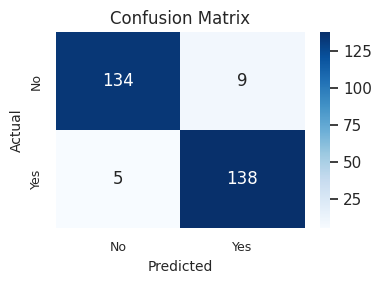

In [126]:
# Predict on the test set using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc:.3f}')
print(f'Recall:   {rec:.3f}')
print(f'F1 Score: {f1:.3f}\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No', 'Yes'],
    yticklabels=['No', 'Yes']
)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.title('Confusion Matrix', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


### Error Analysis

The final Random Forest model demonstrated strong generalization performance on the test set:

- **Accuracy**: 0.951  
- **Recall**: 0.965  
- **F1-score**: 0.952

The confusion matrix reveals the following:

- 5 false negatives: employees who left but were not flagged by the model  
- 9 false positives: employees incorrectly predicted as likely to leave  

**Interpretation.**

The model successfully identifies the majority of employees at risk of leaving, in line with the business goal of maximizing recall. The relatively low number of misclassifications indicates a well-generalized solution.

Given the performance and class balance, the model is suitable for deployment or integration into a retention intervention pipeline.


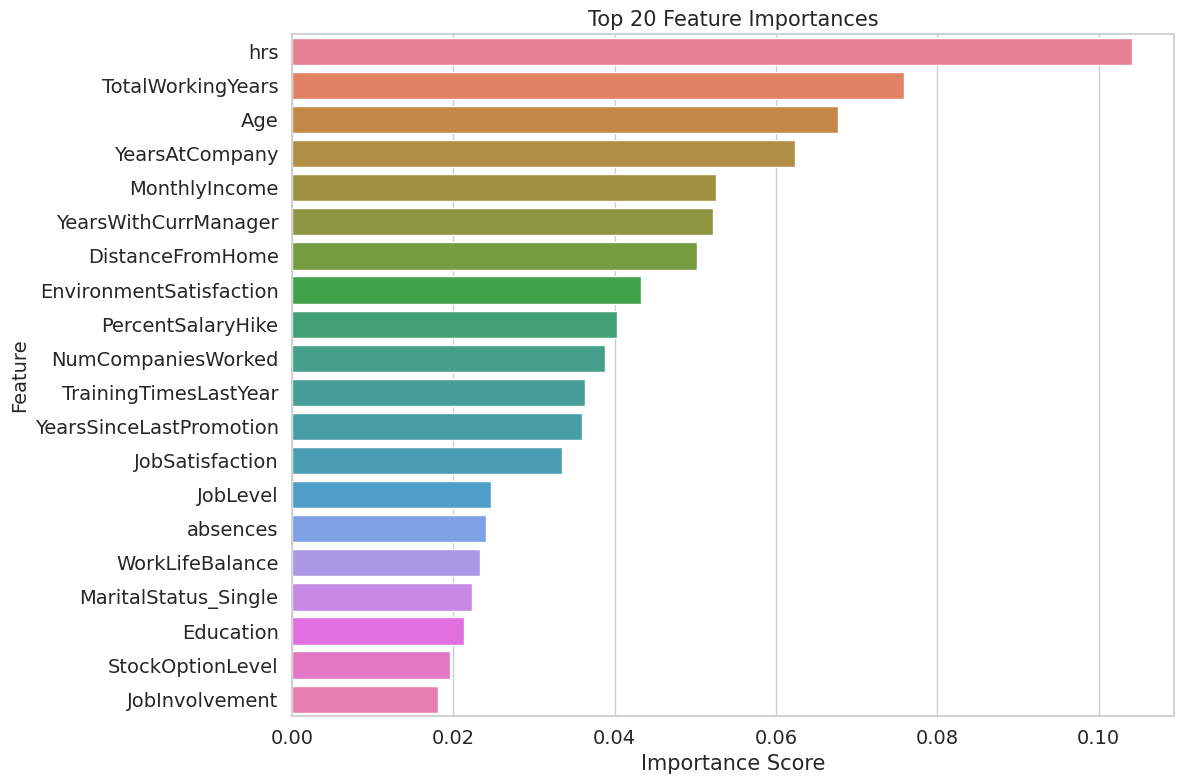

In [127]:
# Compute feature importances from the best model
feature_importances = pd.Series(
    random_search.best_estimator_.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Rename index to avoid 'None' label in plot
feature_importances.index.name = 'Feature'

# Plot top 20 most important features with unique colors
plt.figure(figsize=(12, 8))
sns.barplot(
    x=feature_importances.values[:20],
    y=feature_importances.index[:20],
    hue=feature_importances.index[:20],  # Necesario para que acepte palette
    dodge=False,
    legend=False,
    palette=sns.color_palette("husl", len(feature_importances[:20]))
)
plt.title('Top 20 Feature Importances', fontsize=15)
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### Feature Importance

The feature importance analysis from the final Random Forest model reveals the following:

- `hrs`, `TotalWorkingYears`, `Age`, and `YearsAtCompany` are the most influential predictors of employee attrition.

- Income-related variables such as `MonthlyIncome` and `YearsWithCurrManager` also contribute significantly.

- Satisfaction metrics (`EnvironmentSatisfaction`, `JobSatisfaction`, `WorkLifeBalance`) appear within the top 20, reinforcing their role in employee decision-making.

This shows that attrition is influenced by a mix of factors such as experience, workload, and workplace environment.


### ROC Curve

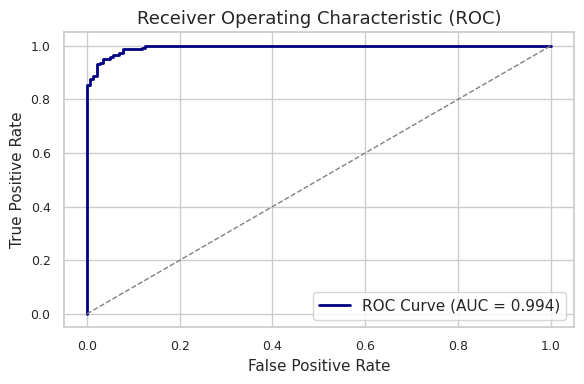

In [128]:
# Get predicted probabilities for the positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='navy', label=f'ROC Curve (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=13)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

The ROC curve shows the relationship between the true positive rate (sensitivity) and the false positive rate at various classification thresholds.

The area under the curve (AUC) is **0.994**, indicating the model's ability to distinguish between classes across all thresholds.

An AUC of 1.0 represents perfect separation, while an AUC of 0.5 corresponds to random performance.

The following CSV file includes the actual labels, predicted values, and predicted probabilities for each observation in the test set. This allows for external validation or further business analysis.


In [129]:
# Export predictions with actual values and probabilities
proba = best_model.predict_proba(X_test)[:, 1]

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Attrition_Probability': proba
})

# Save to CSV
results_df.to_csv('test_set_predictions.csv', index=False)

# Model Comparison

## Logistic Regression Benchmark

To assess the added value of the Random Forest model, a baseline Logistic Regression is trained and evaluated under the same conditions.

This provides a point of comparison with a simpler, more interpretable model and helps justify the use of more complex algorithms if performance improvements are observed.


Logistic Regression - Accuracy: 0.727
Logistic Regression - Recall:   0.741
Logistic Regression - F1 Score: 0.731

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       143
           1       0.72      0.74      0.73       143

    accuracy                           0.73       286
   macro avg       0.73      0.73      0.73       286
weighted avg       0.73      0.73      0.73       286



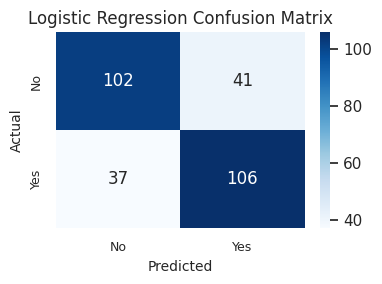

In [130]:
# Scale numerical features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression with increased iterations
logreg = LogisticRegression(random_state=42, max_iter=2000)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluation metrics
acc_logreg = accuracy_score(y_test, y_pred_logreg)
rec_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Print results
print(f'Logistic Regression - Accuracy: {acc_logreg:.3f}')
print(f'Logistic Regression - Recall:   {rec_logreg:.3f}')
print(f'Logistic Regression - F1 Score: {f1_logreg:.3f}\n')
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_logreg,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No', 'Yes'],
    yticklabels=['No', 'Yes']
)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.title('Logistic Regression Confusion Matrix', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()



Comparing the performance of the final Random Forest model with a baseline Logistic Regression model across three metrics: Accuracy, Recall, and F1-score.

Both models were evaluated on the same test set, using identical preprocessing. The bar chart below summarizes their results side by side.


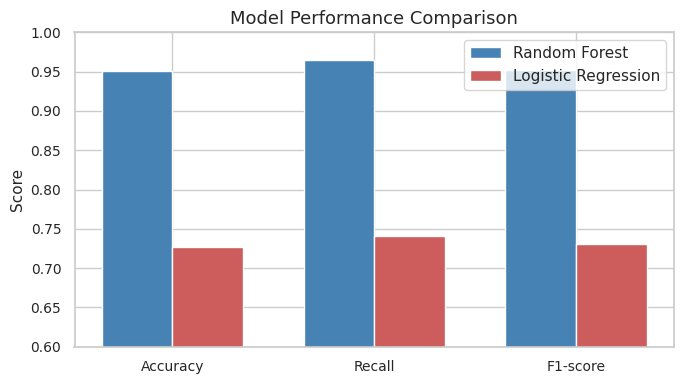

In [131]:
# Define performance metrics
metrics = ['Accuracy', 'Recall', 'F1-score']
rf_scores = [0.951, 0.965, 0.952]
logreg_scores = [0.727, 0.741, 0.731]

x = np.arange(len(metrics))
width = 0.35

# Plot side-by-side bars for both models
plt.figure(figsize=(7, 4))
plt.bar(x - width/2, rf_scores, width, label='Random Forest', color='steelblue')
plt.bar(x + width/2, logreg_scores, width, label='Logistic Regression', color='indianred')

plt.ylabel('Score', fontsize=11)
plt.title('Model Performance Comparison', fontsize=13)
plt.xticks(x, metrics, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.6, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


Based on the comparison, the Random Forest model outperforms Logistic Regression across all three metrics on the test set.

Given its better performance, Random Forest is selected as the preferred model at this stage.  
However, an additional benchmark using XGBoost will be performed next to evaluate potential improvements.


## XGBoost Benchmark

XGBoost - Accuracy: 0.930
XGBoost - Recall:   0.972
XGBoost - F1 Score: 0.933
XGBoost - ROC AUC:  0.985

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       143
           1       0.90      0.97      0.93       143

    accuracy                           0.93       286
   macro avg       0.93      0.93      0.93       286
weighted avg       0.93      0.93      0.93       286



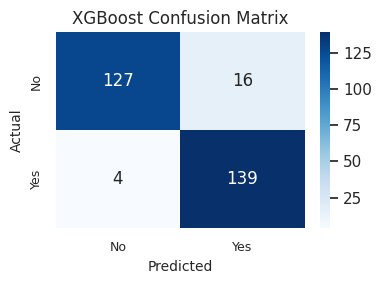

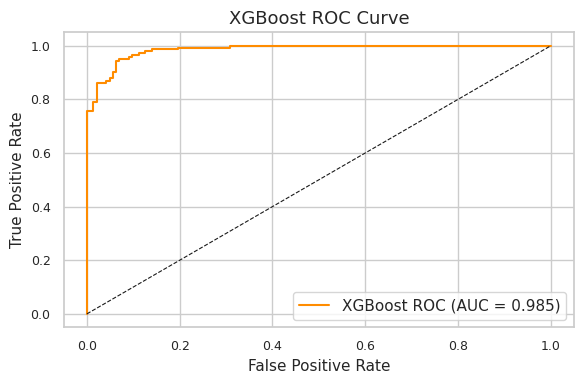

In [132]:
# Train XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print(f'XGBoost - Accuracy: {acc_xgb:.3f}')
print(f'XGBoost - Recall:   {rec_xgb:.3f}')
print(f'XGBoost - F1 Score: {f1_xgb:.3f}')
print(f'XGBoost - ROC AUC:  {auc_xgb:.3f}\n')
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.title('XGBoost Confusion Matrix', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

# ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC (AUC = {auc_xgb:.3f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.8)
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('XGBoost ROC Curve', fontsize=13)
plt.legend(loc='lower right')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()



## Visual Comparison - Random Forest vs. XGBoost

This comparison focuses on the two best-performing models.  
The chart below summarizes their test set results across Accuracy, Recall, and F1-score.


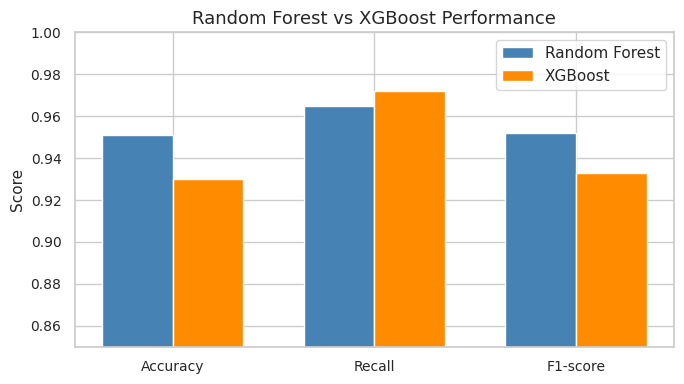

In [133]:
# Define performance metrics
metrics = ['Accuracy', 'Recall', 'F1-score']
rf_scores = [0.951, 0.965, 0.952]
xgb_scores = [0.930, 0.972, 0.933]

x = np.arange(len(metrics))
width = 0.35

# Side-by-side bar plot
plt.figure(figsize=(7, 4))
plt.bar(x - width/2, rf_scores, width, label='Random Forest', color='steelblue')
plt.bar(x + width/2, xgb_scores, width, label='XGBoost', color='darkorange')

plt.ylabel('Score', fontsize=11)
plt.title('Random Forest vs XGBoost Performance', fontsize=13)
plt.xticks(x, metrics, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.85, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


This chart shows that both models perform at a high level, with XGBoost achieving slightly higher recall, while Random Forest leads marginally in accuracy and F1-score.

The trade-off between recall and false positives should guide final model selection based on business priorities.



# Final Model Selection: Random Forest

After evaluating multiple models—including Logistic Regression, XGBoost, and Random Forest—based on performance metrics and business priorities, Random Forest was selected as the final model.

### Key reasons for choosing Random Forest:

- **Strong balance between precision and recall**, with an F1-score of 0.952.

- **Highest AUC (0.994)** among tested models, indicating strong class separation.

- **Lowest total misclassification** (False Positives + False Negatives).
- **Faster to train and easier to deploy** compared to more complex models like XGBoost.

- While XGBoost achieved slightly higher recall (0.972), it also resulted in **more false positives**, which may lead to unnecessary interventions.

Given the goal of identifying at-risk employees while minimizing false alarms, Random Forest offers the best overall trade-off for this problem.


## Final Model Pipeline

A full machine learning pipeline was constructed to enable reproducible predictions on new employee data.

Structure.

- **Input features**: 19 numerical variables selected based on feature importance (threshold > 0.01).

- **Preprocessing**: Median imputation is applied to handle missing values in the input features.

- **Classifier**: A Random Forest model trained with the best hyperparameters identified through cross-validation.

The pipeline integrates preprocessing and prediction into a single object and is trained on the full dataset. It is saved in '.pkl' format and can be used directly to predict attrition for new employees without requiring manual preprocessing.



In [134]:
# Save final trained model (Random Forest with best hyperparameters)
joblib.dump(best_model, 'rf_model_only.pkl')

['rf_model_only.pkl']

In [135]:
# Selected features based on importance (threshold > 0.01)
selected_numerical = [
    'hrs', 'TotalWorkingYears', 'Age', 'YearsAtCompany',
    'MonthlyIncome', 'DistanceFromHome', 'YearsWithCurrManager',
    'PercentSalaryHike', 'EnvironmentSatisfaction', 'NumCompaniesWorked',
    'JobSatisfaction', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
    'absences', 'JobLevel', 'WorkLifeBalance', 'Education',
    'StockOptionLevel', 'JobInvolvement'
]

# Preprocessing: median imputation for numerical features
numerical_transformer = SimpleImputer(strategy='median')

# ColumnTransformer (only numerical)
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, selected_numerical)
])

# Final Random Forest model with best hyperparameters
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=False,
    random_state=42
)

# Full pipeline: preprocessing + classifier
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', model)
])

# Train the pipeline
pipeline.fit(X[selected_numerical], y)

# Save the full pipeline for future predictions
joblib.dump(pipeline, 'rf_pipeline_selected_features.pkl')



['rf_pipeline_selected_features.pkl']

### Using the Pipeline for New Predictions

The pipeline is loaded and used to make predictions on new employee data.  
(For demonstration purposes, the same dataset used for training is reused here.)

It returns both a binary prediction ('Attrition_Prediction') and the probability of attrition ('Attrition_Probability'), which can be used to prioritize retention actions.

The output is saved as a '.csv' file for further analysis or business reporting.


In [136]:
# Load the trained pipeline
pipeline = joblib.load('rf_pipeline_selected_features.pkl')

# Load new employee data from .pkl file ()
new_employees = pd.read_pickle('/content/drive/MyDrive/Desafío Data Science - F1rst Santander/attrition_dataset.pkl')

# Generate predictions
predictions = pipeline.predict(new_employees)

# Generate predicted probabilities (risk of attrition)
probabilities = pipeline.predict_proba(new_employees)[:, 1]

# Combine with input data
results = new_employees.copy()
results['Attrition_Prediction'] = predictions
results['Attrition_Probability'] = probabilities

# Display sample output
print(results.head())

          hrs  absences  JobInvolvement  PerformanceRating  \
1    7.315971        13             2.0                  4   
6    6.450877        17             3.0                  4   
13   8.871421        14             2.0                  3   
28  10.713066         6             2.0                  3   
30   9.662808        11             2.0                  3   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age Attrition  \
1                       3.0              2.0              4.0  31.0       Yes   
6                       1.0              3.0              1.0  28.0       Yes   
13                      1.0              2.0              2.0  47.0       Yes   
28                      4.0              3.0              1.0  44.0       Yes   
30                      1.0              2.0              3.0  26.0       Yes   

       BusinessTravel  ... PercentSalaryHike  StandardHours  StockOptionLevel  \
1   Travel_Frequently  ...                23              8

In [137]:
# Exportar resultados a CSV
results.to_csv('attrition_predictions.csv', index=False)

# Final Conclusion

This project focused on predicting employee attrition based on structured HR data.

After exploring the dataset and testing several modeling approaches, the final solution is a Random Forest model trained with tuned hyperparameters and a focused set of numerical features identified as most relevant.

The model is wrapped into a complete pipeline that handles preprocessing and prediction in one step. It's saved in `.pkl` format and ready to be applied to new employee data.

Both the pipeline and the trained model can be reused to support retention strategies by identifying employees at higher risk of leaving.
